### Q. Part 1 ‐ Exploratory data analysis
    The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

In [2]:
df = pd.read_json('logins.json')
df.head()


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df = df.set_index(['login_time'])
df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [4]:

df['count'] = 1
df15T = df.resample('15T').count().reset_index()
df15T.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [5]:
df15T['Month']=pd.to_datetime(df15T['login_time']).dt.month
df15T['Day']=pd.to_datetime(df15T['login_time']).dt.dayofweek
df15T['Hour']=pd.to_datetime(df15T['login_time']).dt.hour

In [6]:
df15T.head()

,login_time,count,Month,Day,Hour
0,1970-01-01 20:00:00,2,1,3,20
1,1970-01-01 20:15:00,6,1,3,20
2,1970-01-01 20:30:00,9,1,3,20
3,1970-01-01 20:45:00,7,1,3,20
4,1970-01-01 21:00:00,1,1,3,21


In [7]:
len(df15T)

9788

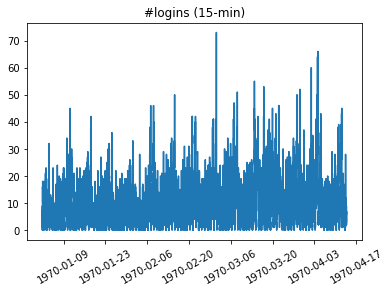

In [8]:
plt.plot(df15T['login_time'], df15T['count'])
plt.title('#logins (15-min)')
plt.xticks(rotation=30);

In [9]:
df15T01 = df15T[df15T.Month == 1]
df15T02 = df15T[df15T.Month == 2]
df15T03 = df15T[df15T.Month == 3]
df15T04 = df15T[df15T.Month == 4]

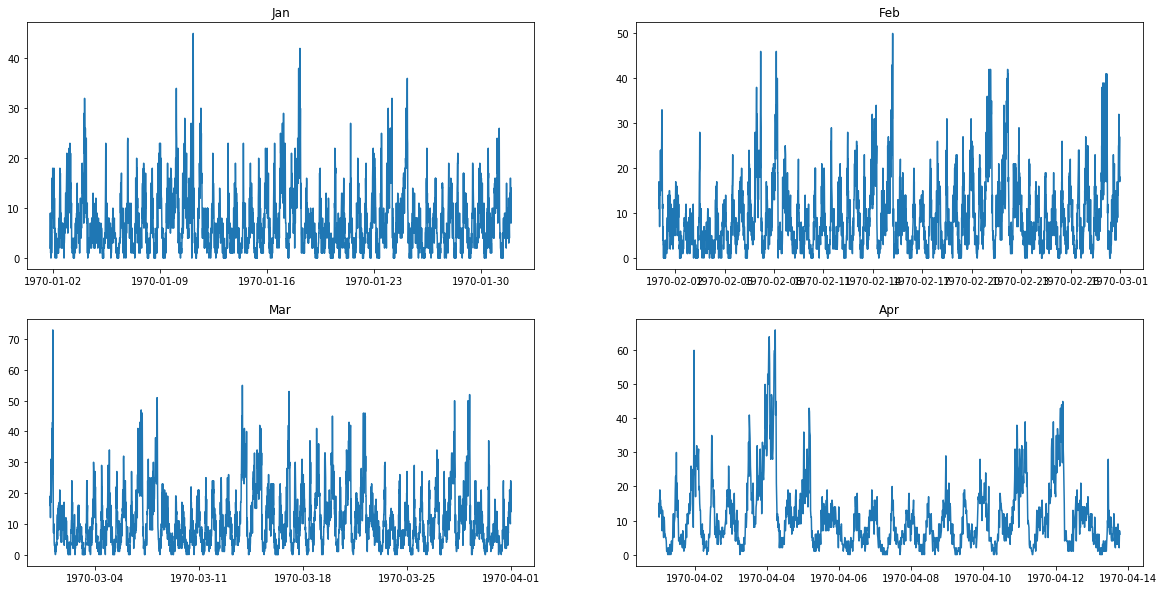

In [10]:

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20, 10))
ax1.plot(df15T01['login_time'], df15T01['count'])
ax2.plot(df15T02['login_time'], df15T02['count'])
ax3.plot(df15T03['login_time'], df15T03['count'])
ax4.plot(df15T04['login_time'], df15T04['count'])

ax1.set_title('Jan')
ax2.set_title('Feb')
ax3.set_title('Mar')
ax4.set_title('Apr')

In [11]:
loginsbyday = df15T.groupby('Day').sum().reset_index()
loginsbyday.head()

,Day,count,Month,Hour
0,0,8823,3280,16140
1,1,9268,2976,15456
2,2,10339,3072,15456
3,3,11960,3088,15800
4,4,15208,3168,16560


In [12]:
wkdays = ['Mon', 'Tues', 'Wed','Thurs', 'Fri', 'Sat', 'Sun']

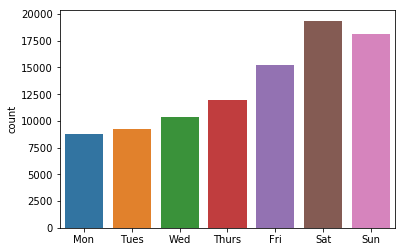

In [13]:
sns.barplot(y=loginsbyday['count'],x=wkdays)

In [14]:
loginsbyhr = df15T.groupby('Hour').sum().reset_index()
loginsbyhr.head()

,Hour,count,Month,Day
0,0,5993,924,1236
1,1,6317,924,1236
2,2,5800,924,1236
3,3,4831,924,1236
4,4,5034,924,1236


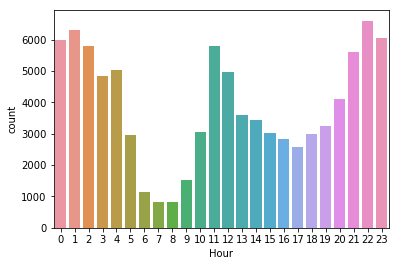

In [15]:
sns.barplot(y=loginsbyhr['count'],x=loginsbyhr['Hour'])

## Findings ‐ Exploratory data analysis
User logins /activity is high during Friday/Saturday/Sundays .Activity is high around noon (11-12 pm) and late night (11 pm -3 am)

## Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

## Part 2 ‐ Experiment and metrics design

The key objective  is to increase profits , improve the driver engagement rates and reduce the customer wait times.

One experiment that could be tried is to monitor the engagement rates , profitability of the driver partners  for a period of 4 months. This should be done for all drivers who signup/dont signup  for availability in both rates . At the end of the 4 month period , a hypothesis test /t-test can be done to validate the impact of tolll reimbursement 

## Predictive Modeling 

1.Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).


In [23]:
import json

file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


     missing values in avg_rating_by_driver ,avg_rating_of_driver,phone

In [25]:
df.phone.value_counts() # lets get the most common value for phone

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [26]:
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna('iPhone', inplace=True)

In [27]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [28]:


df_city = (df[['trips_in_first_30_days','city']].groupby('city').sum().reset_index())
df_phone = (df[['trips_in_first_30_days','phone']].groupby('phone').sum().reset_index())


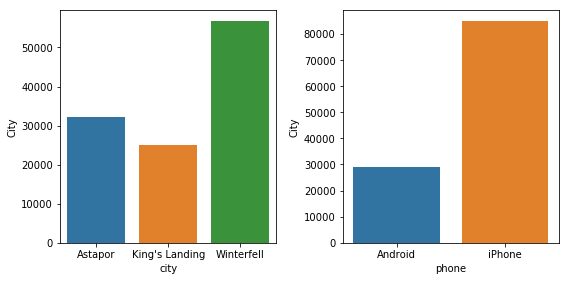

In [29]:
fig, axs = plt.subplots(1,2,figsize=(8,4))
sns.barplot(x='city', y='trips_in_first_30_days', data=df_city,ax=axs[0])
sns.barplot(x='phone', y='trips_in_first_30_days', data=df_phone,ax=axs[1])
axs[0].set_ylabel('Total trips in first 30 Days')
axs[0].set_ylabel('City')
axs[1].set_ylabel('Total trips in first 30 Days')
axs[1].set_ylabel('City')

fig.tight_layout()

In [30]:
df.last_trip_date.describe()

count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [31]:
df['retained_days'] = (df['last_trip_date'] - df['signup_date'])
df.insert(0,"retention", [(1 if (x.retained_days > (timedelta(days=120))) else 0) for index, x in df.iterrows() ])

df.head()

,retention,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_days
0,1,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,143 days
1,0,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,96 days
2,0,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1 days
3,1,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,170 days
4,0,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,47 days


In [32]:
df['retention'].sum()/len(df)

0.44988

In [33]:
# One-hot-encode all categorical features
df_coded = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'])
df_coded.head()

,retention,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,retained_days,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,1,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,46.2,143 days,0,1,0,0,1,0,1
1,0,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,50.0,96 days,1,0,0,1,0,1,0
2,0,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,100.0,1 days,1,0,0,0,1,1,0
3,1,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,80.0,170 days,0,1,0,0,1,0,1
4,0,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,82.4,47 days,0,0,1,1,0,1,0


In [34]:
df_coded.drop(['last_trip_date','signup_date','retained_days'],axis=1, inplace=True)

In [35]:
y = df_coded['retention'].values

In [36]:
x = df_coded.drop(['retention'],axis=1)

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression

In [39]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [40]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Classification Report of Logistic Regression Classifier            ")
print("-------------------------------------------------------------")
print(classification_report(y_test, y_pred))

Classification Report of Logistic Regression Classifier            
-------------------------------------------------------------
             precision    recall  f1-score   support

          0       0.67      0.78      0.72      5489
          1       0.67      0.54      0.60      4511

avg / total       0.67      0.67      0.67     10000



In [41]:
RandForest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

RandForest.fit(x_train,y_train)

y_pred_f = RandForest.predict(x_test)
y_pred_pf = RandForest.predict_proba(x_test)[:,1]

print("Classification Report of Random Forest Classifier            ")
print("-------------------------------------------------------------")
print(classification_report(y_test, y_pred_f))

Classification Report of Random Forest Classifier            
-------------------------------------------------------------
             precision    recall  f1-score   support

          0       0.73      0.77      0.75      5489
          1       0.70      0.66      0.68      4511

avg / total       0.72      0.72      0.72     10000



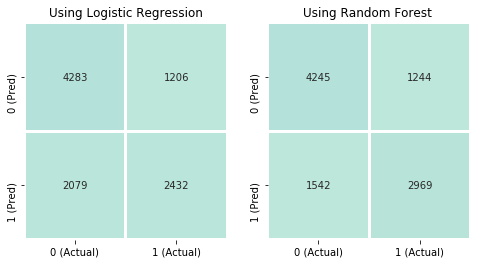

In [42]:
%matplotlib inline
cm1 = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred_f)

col1 = ["0 (Actual)","1 (Actual)"]
col2 = ["0 (Pred)","1 (Pred)"]

fig, axs = plt.subplots(1,2,figsize=(8,4))
axs[0].set_title("Using Logistic Regression")
axs[1].set_title("Using Random Forest ")

sns.heatmap(pd.DataFrame(cm1, columns=col1, index=col2),annot=True,fmt="d", linewidths=2,cbar=False,center=100000,ax=axs[0]);
sns.heatmap(pd.DataFrame(cm2, columns=col1, index=col2),annot=True,fmt="d", linewidths=2,cbar=False,center=100000,ax=axs[1]);


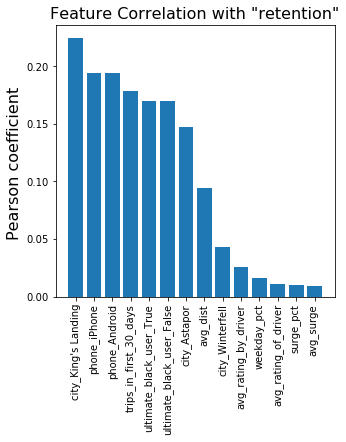

In [43]:
def display_corr(dataset, target):
    corr_matrix = dataset.corr()
    corr = corr_matrix[target].copy()
    abs_corr = corr.apply(lambda x: abs(x))
    
    sorted_values = abs_corr.sort_values(ascending=False)
    y_val = list(sorted_values.values)[1:]
    x_val = range(0,len(y_val))
    
    xlabels = list(sorted_values.keys())[1:]
    
    fig, ax = plt.subplots(figsize=(5,5))
    ax.bar(x_val, y_val)
    ax.set_title('Feature Correlation with "{}"'.format(target), fontsize=16)
    ax.set_ylabel('Pearson coefficient ', fontsize=16)
    plt.xticks(x_val, xlabels, rotation='vertical')
    plt.show()
 
display_corr(df_coded, 'retention')

## Predictive Modeling : Summary
From the correleration (pearson coefficients) we see that the key factors impactimg the customer retention are
    Users in King's landing
    trips in first 30 days.

  To improve the customer retention rates , Ultimate needs to evaluate the differences between Kings Landing and other cities. As the trips in the first month plays an important role in the retention rates,Ultimate should have promotions for first time users during the first month.